In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("indicators_info.csv")
df.head()

,IndicatorCode,IndicatorName,NumCountries,NumYears,FirstYear,LastYear
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",219,49,1961,2009
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,118,12,2002,2013
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,188,12,2002,2013
3,AG.LND.AGRI.K2,Agricultural land (sq. km),242,53,1961,2013
4,AG.LND.AGRI.ZS,Agricultural land (% of land area),241,53,1961,2013


In [3]:
len(df)

1344

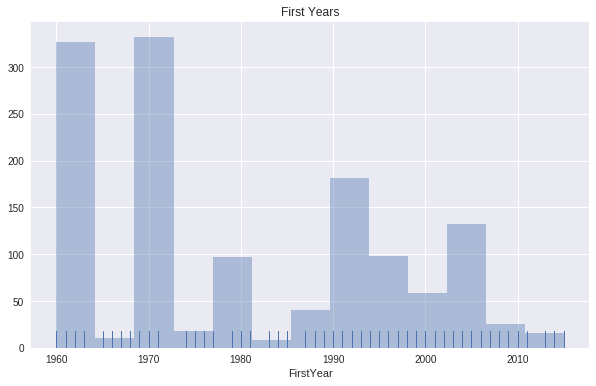

In [4]:
sns.set(rc={"figure.figsize": (10, 6)})
ax = sns.distplot(df["FirstYear"], kde=False, rug=True)
ax.set_title('First Years')

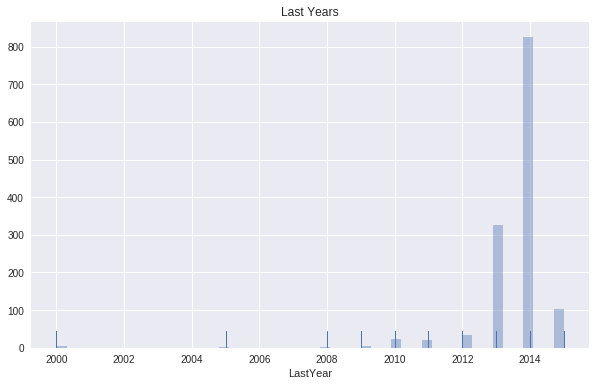

In [5]:
ax = sns.distplot(df["LastYear"], kde=False, rug=True)
ax.set_title('Last Years')

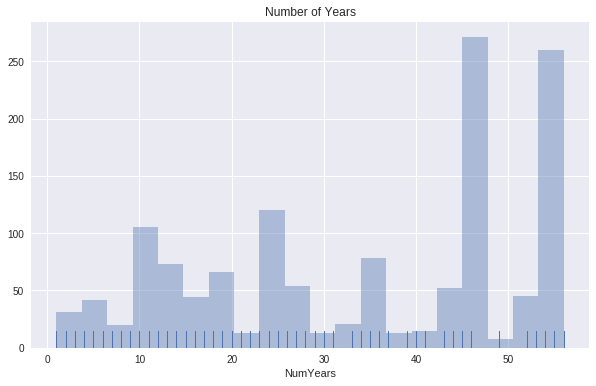

In [6]:
ax = sns.distplot(df["NumYears"], kde=False, rug=True, bins=20)
ax.set_title('Number of Years')

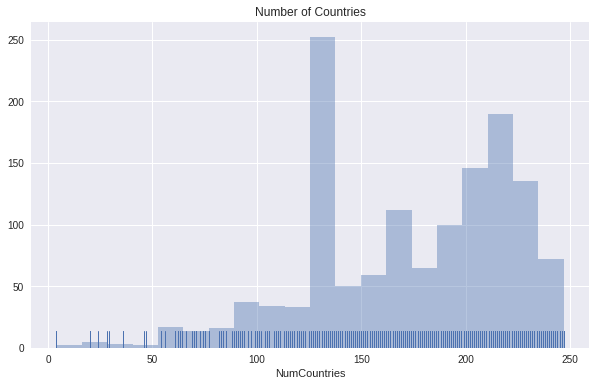

In [7]:
ax = sns.distplot(df["NumCountries"], kde=False, rug=True, bins=20)
ax.set_title('Number of Countries')

In [12]:
print("Indicators used by 200+ countries: {}".format(sum(df["NumCountries"] >= 200)))
print("Indicators around for 35+ years: {}".format(sum(df["NumYears"] >= 35)))
print("Indicators used by 200+ countries AND 35+ years: {}".format(
        len(df[(df["NumCountries"] >= 200) & (df["NumYears"] >= 35)])))

Indicators used by 200+ countries: 529
Indicators around for 35+ years: 736
Indicators used by 200+ countries AND 35+ years: 311


Let's look at which indicators are in common use now but have not been around that long:

In [13]:
print("Indicators used by 200+ countries for < 35 years: {}".format(
        len(df[(df["NumCountries"] >= 200) & (df["NumYears"] < 35)])))
print()
print(df[(df["NumCountries"] >= 200) & (df["NumYears"] < 35)][["IndicatorName", "NumYears"]].to_string())

Indicators used by 200+ countries for < 35 years: 218

                                          IndicatorName  NumYears
10    Land area where elevation is below 5 meters (%...         2
11                                 Forest area (sq. km)        23
12                         Forest area (% of land area)        24
23                         Trade in services (% of GDP)        10
24    Communications, computer, etc. (% of service i...        10
25      Primary income payments (BoP, current USdollar)        10
26    Imports of goods and services (BoP, current US...        10
27    Insurance and financial services (% of service...        10
28                Goods imports (BoP, current USdollar)        10
29              Service imports (BoP, current USdollar)        10
31    Imports of goods, services and primary income ...        10
32       Transport services (% of service imports, BoP)        10
33          Travel services (% of service imports, BoP)        10
35    Secondary incom

**Conclusion**: The majority commonly used indicators that have been around for < 35 years have to do with:
1. trade 
2. energy/electricity/power 
3. health
4. employment/labor force stats

The first 3 are a result of rising globalization & technological development, and are likely very important to any current economic modeling. 

**TODO**: figure out how to impute missing values for these instead of dropping them

Now let's look at which indicators are still in the running:

In [14]:
print(df[(df["NumCountries"] >= 200) & (df["NumYears"] >= 35)]["IndicatorName"].to_string())

0                        Agricultural machinery, tractors
3                              Agricultural land (sq. km)
4                      Agricultural land (% of land area)
5                                  Arable land (hectares)
6                       Arable land (hectares per person)
7                            Arable land (% of land area)
8                 Land under cereal production (hectares)
9                     Permanent cropland (% of land area)
15                                     Land area (sq. km)
16      Agricultural machinery, tractors per 100 sq. k...
17                        Cereal production (metric tons)
18                Crop production index (2004-2006 = 100)
19                Food production index (2004-2006 = 100)
20           Livestock production index (2004-2006 = 100)
21                                  Surface area (sq. km)
22                          Cereal yield (kg per hectare)
36          Personal remittances, paid (current USdollar)
63      Foreig

In [22]:
inds = list(df[(df["NumCountries"] >= 200) & (df["NumYears"] >= 35)]["IndicatorCode"])
inds

['AG.AGR.TRAC.NO',
 'AG.LND.AGRI.K2',
 'AG.LND.AGRI.ZS',
 'AG.LND.ARBL.HA',
 'AG.LND.ARBL.HA.PC',
 'AG.LND.ARBL.ZS',
 'AG.LND.CREL.HA',
 'AG.LND.CROP.ZS',
 'AG.LND.TOTL.K2',
 'AG.LND.TRAC.ZS',
 'AG.PRD.CREL.MT',
 'AG.PRD.CROP.XD',
 'AG.PRD.FOOD.XD',
 'AG.PRD.LVSK.XD',
 'AG.SRF.TOTL.K2',
 'AG.YLD.CREL.KG',
 'BM.TRF.PWKR.CD.DT',
 'BX.KLT.DINV.CD.WD',
 'BX.KLT.DINV.WD.GD.ZS',
 'BX.PEF.TOTL.CD.WD',
 'BX.TRF.PWKR.CD.DT',
 'BX.TRF.PWKR.DT.GD.ZS',
 'DC.DAC.AUSL.CD',
 'DC.DAC.CANL.CD',
 'DC.DAC.CECL.CD',
 'DC.DAC.DEUL.CD',
 'DC.DAC.FRAL.CD',
 'DC.DAC.GBRL.CD',
 'DC.DAC.JPNL.CD',
 'DC.DAC.NLDL.CD',
 'DC.DAC.TOTL.CD',
 'DC.DAC.USAL.CD',
 'DT.NFL.UNDP.CD',
 'DT.NFL.UNFP.CD',
 'DT.NFL.UNTA.CD',
 'DT.ODA.ALLD.CD',
 'DT.ODA.ALLD.KD',
 'EA.PRD.AGRI.KD',
 'EG.USE.COMM.FO.ZS',
 'EG.USE.PCAP.KG.OE',
 'EN.ATM.CO2E.EG.ZS',
 'EN.ATM.CO2E.GF.KT',
 'EN.ATM.CO2E.GF.ZS',
 'EN.ATM.CO2E.KD.GD',
 'EN.ATM.CO2E.KT',
 'EN.ATM.CO2E.LF.KT',
 'EN.ATM.CO2E.LF.ZS',
 'EN.ATM.CO2E.PC',
 'EN.ATM.CO2E.SF.KT',
 'EN.ATM.CO2E.S

In [32]:
# Save indicators
df[(df["NumCountries"] >= 200) & (df["NumYears"] >= 35)].to_csv("data/top_inds_list.csv")

Edits to the top_inds_list.csv (saved in top_inds_list_edited.csv):

* dropped repetitive features (eg. net bilateral aid flows from various countries, kept total aid)
* dropped features measured in "constant 2005 US Dollar" when there is a measurement in "current US dollar"
* dropped measurements in LCU (local currency unit), kept USD

In [62]:
f_inds_df = pd.read_csv("data/female_inds.csv")
f_inds_df.head()

,IndicatorCode,IndicatorName,NumCountries,NumYears,FirstYear,LastYear
0,SE.ENR.PRIM.FM.ZS,"Gross enrolment ratio, primary, gender parity ...",230,45,1970,2014
1,SE.ENR.PRSC.FM.ZS,"Gross enrolment ratio, primary and secondary, ...",228,45,1970,2014
2,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parit...",228,45,1970,2014
3,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity...",224,45,1970,2014
4,SE.PRE.ENRR.FE,"Gross enrolment ratio, pre-primary, female (%)",224,45,1970,2014


In [63]:
f_inds = list(f_inds_df["IndicatorCode"])
f_inds.append('NY.GDP.PCAP.CD') # Add GDP per capita: to predict

## Load Indicators

In [18]:
full_inds_df = pd.read_csv("data/Indicators.csv")
full_inds_df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [19]:
len(full_inds_df)

5656458

In [64]:
# grab all data about the specified female edu/employment indicators
inds_df = full_inds_df[full_inds_df["IndicatorCode"].isin(f_inds)]
inds_df.to_csv("data/indicators_female.csv")
len(inds_df)

226696

In [65]:
# create reference map: {Indicator code: indicator name}
ind_name = {}
for i, row in f_inds_df.iterrows():
    ind_name[row["IndicatorCode"]] = row["IndicatorName"]

In [45]:
def get_value(df, code, year):
    if not any((df["IndicatorCode"] == code) & (df["Year"] == year)):
        return float("nan")
    return df.loc[(df["IndicatorCode"]==code) & (df["Year"]==year), "Value"].item()

In [79]:
# get df for country where rows=years and columns=[edu inds] 

def get_country_inds(country):
    country_df = inds_df[inds_df["CountryCode"]==country]
    data = {}
    for ind in f_inds:
        data[ind] = [get_value(country_df, ind, year) for year in range(1980, 2014)]
        data["year"] = [year for year in range(1980, 2014)]
    return data

def get_country_df(country):
    return pd.DataFrame(get_country_inds(country))

In [96]:
us_df = get_country_df("USA")
us_df.head()

,NY.GDP.PCAP.CD,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.ENRR.FE,SE.PRM.CMPT.FE.ZS,SE.PRM.ENRL.FE.ZS,SE.PRM.ENRR.FE,SE.PRM.GINT.FE.ZS,...,SL.TLF.ACTI.1524.FE.NE.ZS,SL.TLF.CACT.FE.NE.ZS,SL.TLF.CACT.FM.NE.ZS,SL.UEM.TOTL.FE.NE.ZS,SP.DYN.AMRT.FE,SP.DYN.CONU.ZS,SP.DYN.LE00.FE.IN,SP.DYN.TFRT.IN,SP.DYN.TO65.FE.ZS,year
0,12597.667510,NaN,NaN,NaN,1.04909,NaN,NaN,NaN,NaN,NaN,...,61.900002,51.500000,66.537466,7.4,102.510,NaN,77.5,1.8395,83.41933,1980
1,13993.166744,0.99579,1.00303,1.01015,1.07480,50.91098,NaN,48.77081,98.82564,NaN,...,61.900002,52.099998,67.662336,7.9,100.816,NaN,77.9,1.8120,83.67285,1981
2,14438.976276,0.99075,0.99817,1.00546,1.08967,50.84621,NaN,48.66806,100.36298,NaN,...,62.000000,52.599998,68.668407,9.4,97.470,69.5,78.1,1.8275,83.92637,1982
3,15561.426396,0.97637,0.98920,1.00163,1.08163,54.40774,NaN,48.29416,98.07499,NaN,...,61.900002,52.900002,69.240838,9.2,96.994,NaN,78.1,1.7990,84.05558,1983
4,17134.286017,0.99213,0.99390,0.99561,1.09264,NaN,NaN,48.66431,97.59158,NaN,...,62.799999,53.599998,70.157065,7.6,96.067,NaN,78.2,1.8065,84.18479,1984


In [81]:
country_list = set(inds_df["CountryCode"])
len(country_list)

247

In [82]:
# get indicator data (in map form) for each country
f_inds_map = []
for country in country_list:
    f_inds_map.append(get_country_inds(country))

In [83]:
# put together above data into one dataframe, dropping all rows without a GDP per capita value
full_df = pd.concat([pd.DataFrame(c) for c in f_inds_map], ignore_index=True)
full_df = full_df[pd.notnull(full_df['NY.GDP.PCAP.CD'])]
len(full_df)

7253

In [86]:
full_df.to_csv("data/female_indicators_missing.csv")

In [90]:
# impute missing values from df
from fancyimpute import BiScaler, KNN, SoftImpute

df_imputed = KNN(k=3).complete(full_df)
df_imputed

Imputing row 1/7253 with 22 missing, elapsed time: 11.570
Imputing row 101/7253 with 36 missing, elapsed time: 11.656
Imputing row 201/7253 with 17 missing, elapsed time: 11.707
Imputing row 301/7253 with 33 missing, elapsed time: 11.784
Imputing row 401/7253 with 10 missing, elapsed time: 11.854
Imputing row 501/7253 with 36 missing, elapsed time: 11.928
Imputing row 601/7253 with 34 missing, elapsed time: 11.989
Imputing row 701/7253 with 29 missing, elapsed time: 12.076
Imputing row 801/7253 with 14 missing, elapsed time: 12.130
Imputing row 901/7253 with 21 missing, elapsed time: 12.205
Imputing row 1001/7253 with 10 missing, elapsed time: 12.266
Imputing row 1101/7253 with 19 missing, elapsed time: 12.319
Imputing row 1201/7253 with 21 missing, elapsed time: 12.390
Imputing row 1301/7253 with 21 missing, elapsed time: 12.451
Imputing row 1401/7253 with 8 missing, elapsed time: 12.514
Imputing row 1501/7253 with 20 missing, elapsed time: 12.573
Imputing row 1601/7253 with 12 missin

array([[  7.31591981e+02,   7.53630000e-01,   7.86859735e-01, ...,
          6.74800000e+00,   5.71104500e+01,   1.98000000e+03],
       [  7.85420069e+02,   7.56280000e-01,   7.45986436e-01, ...,
          6.63200000e+00,   5.73072700e+01,   1.98100000e+03],
       [  7.64480986e+02,   7.75770000e-01,   7.51743982e-01, ...,
          6.52500000e+00,   5.75040800e+01,   1.98200000e+03],
       ..., 
       [  4.82851442e+03,   9.91249979e-01,   9.98120010e-01, ...,
          1.87882807e+00,   8.36363232e+01,   2.01100000e+03],
       [  5.34681082e+03,   9.86970007e-01,   9.98830020e-01, ...,
          1.87919750e+00,   8.38824031e+01,   2.01200000e+03],
       [  5.84694396e+03,   9.89669979e-01,   9.99379992e-01, ...,
          1.87863885e+00,   8.41239423e+01,   2.01300000e+03]])

In [92]:
df_imputed = pd.DataFrame(df_imputed, columns=full_df.columns)

In [95]:
df_imputed.to_csv("data/knn_imputed_indicators.csv", index=False)